In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

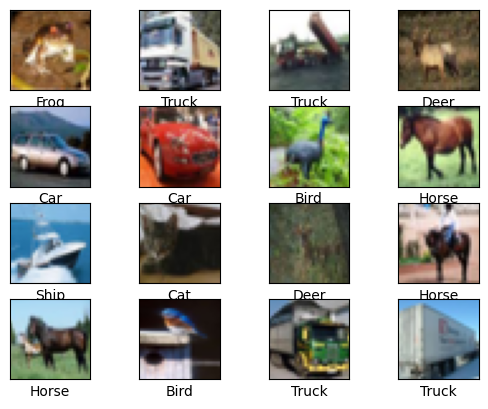

Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)


In [10]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
training_images = training_images.astype('float32') / 255.0
testing_images = testing_images.astype('float32') / 255.0

class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

plt.show()

print("Training images shape:", training_images.shape)
print("Testing images shape:", testing_images.shape)


In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

loss,accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss:{loss}")
print(f"Accuracy:{accuracy}")



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3569 - loss: 1.7380 - val_accuracy: 0.5341 - val_loss: 1.2948
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5686 - loss: 1.2194 - val_accuracy: 0.6209 - val_loss: 1.0827
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6398 - loss: 1.0335 - val_accuracy: 0.6487 - val_loss: 0.9991
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6747 - loss: 0.9211 - val_accuracy: 0.6584 - val_loss: 0.9714
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7077 - loss: 0.8364 - val_accuracy: 0.6858 - val_loss: 0.9041
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7283 - loss: 0.7782 - val_accuracy: 0.6892 - val_loss: 0.9085
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7450 - loss: 0.7306 - val_accuracy: 0.6946 - val_loss: 0.9032
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7619 -

In [ ]:
model.save('image_classifier.keras')
